## Group Number: 9
## Names: Aaryan, Sanika, Neelakshi 
## Project Name: VPN Classification

In [ ]:
import pandas as pd
from imblearn.over_sampling import ADASYN
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC


In [ ]:
# Load dataset
dataset = pd.read_csv('/content/processed_data.csv')


In [ ]:
# Train-test split
train, test = train_test_split(dataset, test_size=0.3)
X_train_raw = train.drop(["label"], axis=1)
y_train_raw = train["label"]
X_test_raw = test.drop(["label"], axis=1)
y_test_raw = test["label"]

In [ ]:
# Under and oversampling the data
under = RandomUnderSampler(replacement=False)
over = ADASYN(n_neighbors=10, n_jobs=-1)
X_train, y_train = over.fit_resample(X_train_raw, y_train_raw)
X_test, y_test = under.fit_resample(X_test_raw, y_test_raw)


/usr/local/lib/python3.10/dist-packages/imblearn/over_sampling/_adasyn.py:156: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


In [ ]:
# Print class distribution after sampling
print(y_train.value_counts())
print(y_test.value_counts())

1    101841
0    101808
Name: label, dtype: int64
0    917
1    917
Name: label, dtype: int64


SVM Test Accuracy: 0.8953107960741549
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.88      0.89       917
           1       0.88      0.91      0.90       917

    accuracy                           0.90      1834
   macro avg       0.90      0.90      0.90      1834
weighted avg       0.90      0.90      0.90      1834



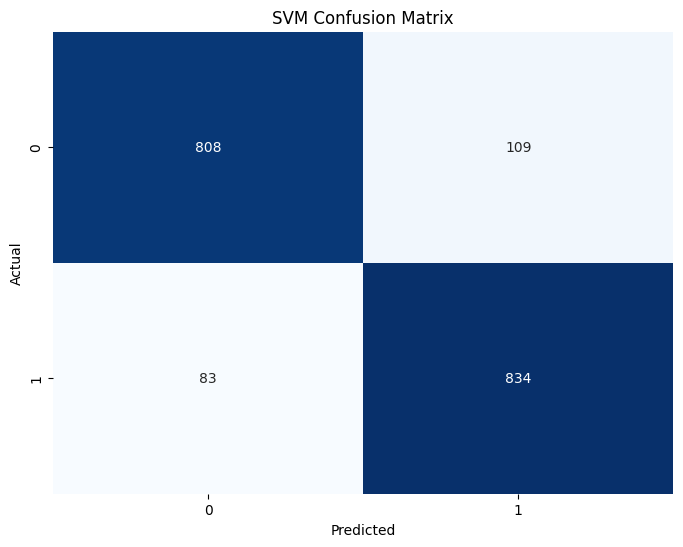

In [ ]:
# SVM Model
svm_model = SVC(C=1.0, kernel='linear', class_weight='balanced', random_state=42)
svm_model.fit(X_train, y_train)

# Evaluate SVM on the test set
y_pred_svm = svm_model.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Test Accuracy: {accuracy_svm}")
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))

# SVM Confusion Matrix
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()